# GRIP at the Sparks Foundation 

# Task 2 : explore supervised Machine learning 

# Using  linear regression:

In [4]:
#For Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm

url = "http://bit.ly/w-data"
dt=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [5]:
dt

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:

dt.shape

(25, 2)

In [7]:
dt.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Average study hours:


In [11]:
dt['Hours'].mean()

5.012

Average scores:

In [12]:
dt['Scores'].mean()

51.48

In [8]:
#sort the value by score
dt.sort_values(by="Scores")

,Hours,Scores
14,1.1,17
5,1.5,20
0,2.5,21
17,1.9,24
9,2.7,25
2,3.2,27
20,2.7,30
4,3.5,30
16,2.5,30
22,3.8,35


List out student list according to passed students:

In [21]:
dt[dt['Scores']>33].sort_values(by='Scores')

,Hours,Scores
22,3.8,35
12,4.5,41
13,3.3,42
1,5.1,47
21,4.8,54
7,5.5,60
11,5.9,62
18,6.1,67
19,7.4,69
3,8.5,75


List out student list according to Failed student:

In [22]:
dt[dt['Scores']<33].sort_values(by='Scores')

,Hours,Scores
14,1.1,17
5,1.5,20
0,2.5,21
17,1.9,24
9,2.7,25
2,3.2,27
4,3.5,30
16,2.5,30
20,2.7,30


data says linear trend has been followed

# Visualizing dataset: 

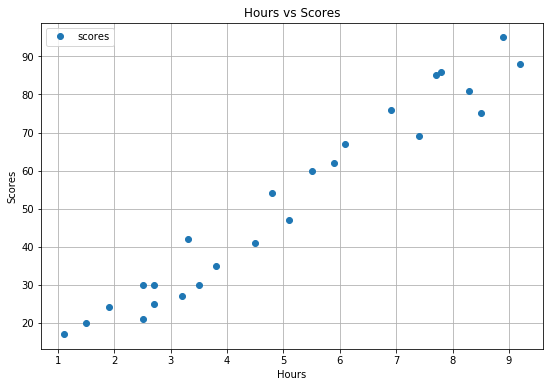

In [32]:
plt.figure(figsize=(9,6))
plt.title("Hours vs Scores")
plt.plot(dt['Hours'], dt['Scores'],'o' ,label="scores")
plt.grid(True)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()

# Training data

In [44]:
#split the test set and train sets
X = dt[['Hours']]
y=  dt['Scores']
test_X=X[18:]
test_y=y[18:]

In [45]:
#import linear regration from sklearn.linear_model

from sklearn.linear_model import LinearRegression
X_train=pd.DataFrame(dt['Hours'])
y_train=pd.DataFrame(dt['Scores'])

linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
print("Theta",linear_reg.coef_)
print("Intercept",linear_reg.intercept_)
print("Evalute the model",linear_reg.score(X_train,y_train))

Theta [[9.77580339]]
Intercept [2.48367341]
Evalute the model 0.9529481969048356


# prediction

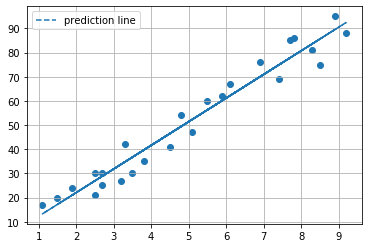

In [46]:
#Y = theta*x + intercept
theta = linear_reg.coef_
c = linear_reg.intercept_
plt.grid(True)
plt.scatter(X,y)
plt.plot(X_train,np.multiply(theta,X_train)+c,'--',label='prediction line')
plt.legend()

# Final Prediction 

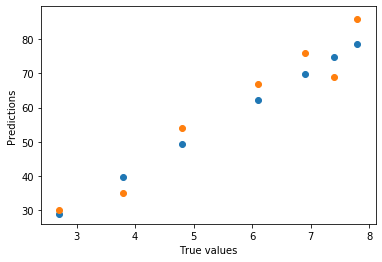

In [47]:
#predction value and actual value plotting
predictions=linear_reg.predict(test_X)
plt.scatter(test_X,predictions)
plt.scatter(test_X,test_y)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

In [48]:
hours=[9.25,8.1,5,2.4]
n=np.array([9.25,7.8,4.1,2])[:,np.newaxis]

In [49]:
p=linear_reg.predict(n)
for h in range(len(hours)):
    print("{0:20s} {1}".format("Hours Studied-",hours[h]))
    print("{0:20s} {1}".format("Scores Achieved-",round(p[h][0],1)))
    print("\n")

Hours Studied-       9.25
Scores Achieved-     92.9


Hours Studied-       8.1
Scores Achieved-     78.7


Hours Studied-       5
Scores Achieved-     42.6


Hours Studied-       2.4
Scores Achieved-     22.0




In [37]:
#mean absolute error
from sklearn import metrics
print("mean absolute error :",metrics.mean_absolute_error(test_y,predictions))

mean absolute error : 4.734839478678187


# Thanks